In [1]:
import os

import numpy as np

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

from hmmlearn.hmm import GaussianHMM

from matplotlib import pyplot as plt
import seaborn as sns

### PCA

In [2]:
normal_spec_list = []

for file in os.listdir('data/normal'):
    spec_db = np.load('data/normal/' + file).T.reshape(-1, 1)
    normal_spec_list.append(spec_db)
    
normal_label_list = [0] * len(normal_spec_list)

In [3]:
whistle_spec_list = []

for file in os.listdir('data/whistle'):
    spec_db = np.load('data/whistle/' + file).T.reshape(-1, 1)
    whistle_spec_list.append(spec_db)

whistle_label_list = [1] * len(whistle_spec_list)

In [4]:
train_data = np.hstack(normal_spec_list + whistle_spec_list)
train_data.shape

(205000, 457)

In [5]:
pca = PCA(n_components=256)
X_pca = pca.fit_transform(train_data.T)

In [6]:
X_pca.shape

(457, 256)

### GMM

In [7]:
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(X_pca)

GaussianMixture(n_components=2)

In [8]:
pred = gmm.predict(X_pca)

In [9]:
acc = accuracy_score(normal_label_list + whistle_label_list, pred)
f1 = f1_score(normal_label_list + whistle_label_list, pred)
roc_auc = roc_auc_score(normal_label_list + whistle_label_list, pred)
acc, f1, roc_auc

(0.6170678336980306, 0.3816254416961131, 0.5994239631336405)

In [10]:
conf_matrix = confusion_matrix(normal_label_list + whistle_label_list, pred)

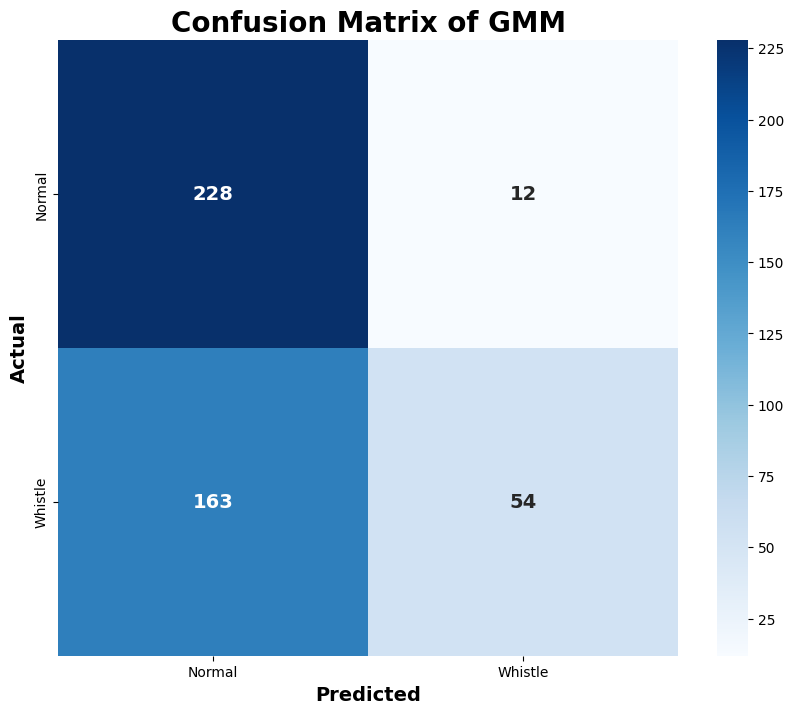

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Whistle'], yticklabels=['Normal', 'Whistle'], annot_kws={'size': 14, 'weight': 'bold'})
plt.title('Confusion Matrix of GMM', fontsize=20, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.show()

### HMM

In [7]:
hmm = GaussianHMM(n_components=2, covariance_type='full')
hmm.fit(X_pca)

GaussianHMM(covariance_type='full', n_components=2)

In [8]:
pred = hmm.predict(X_pca)

In [9]:
acc = accuracy_score(normal_label_list + whistle_label_list, pred)
f1 = f1_score(normal_label_list + whistle_label_list, pred)
roc_auc = roc_auc_score(normal_label_list + whistle_label_list, pred)
acc, f1, roc_auc

(0.3851203501094092, 0.5370675453047775, 0.4026593701996928)

In [10]:
conf_matrix = confusion_matrix(normal_label_list + whistle_label_list, pred)

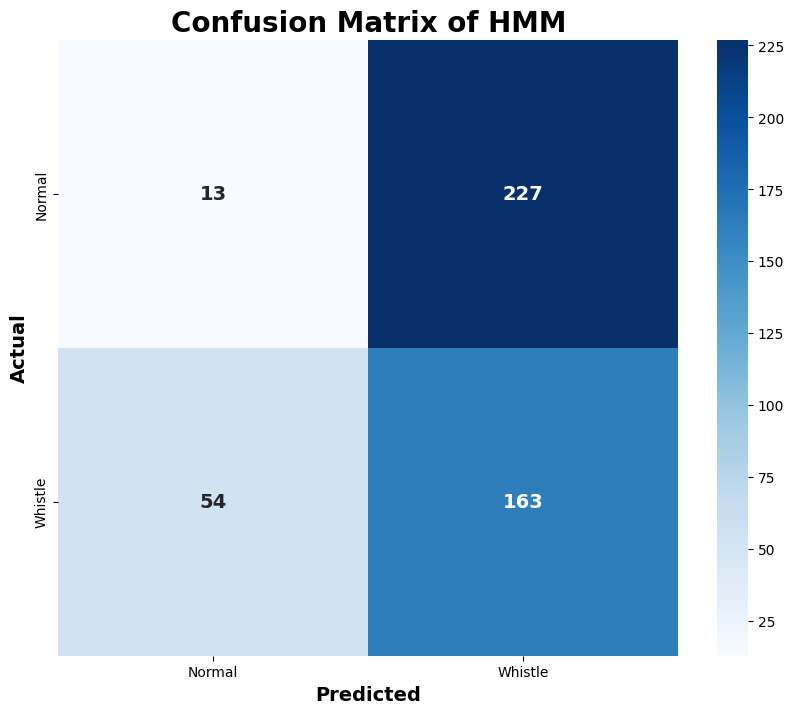

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Whistle'], yticklabels=['Normal', 'Whistle'], annot_kws={'size': 14, 'weight': 'bold'})
plt.title('Confusion Matrix of HMM', fontsize=20, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.show()